In [67]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [75]:
# ----- parameters
data_dir = "/home/kcho/build-ucla-data/printed_with_ids/"
random_seed = 10
valid_size = 0.4

# ----- data transform
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((1, 1, 1), (1, 1, 1))])

# ----- data loading
# positive folder:1977 images
# negative folder: 842 images

# define the dataset object
train_dataset = datasets.ImageFolder(
    root=data_dir, transform=transform,
)
val_dataset = datasets.ImageFolder(
    root=data_dir, transform=transform,
)

# details
num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train)) #1692 training, 1127 validation
np.random.seed(random_seed)
np.random.shuffle(indices)


# define training and validation idx 
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# define the loaders
num_workers = 2
pin_memory = False
batch_size =10
classes='negative', 'positive'
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, sampler=train_sampler,
    num_workers=num_workers, pin_memory=pin_memory,
)
valid_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, sampler=valid_sampler,
    num_workers=num_workers, pin_memory=pin_memory,
)

positive positive positive positive positive positive negative negative positive positive

 1
 1
 1
 1
 1
 1
 0
 0
 1
 1
[torch.LongTensor of size 10]



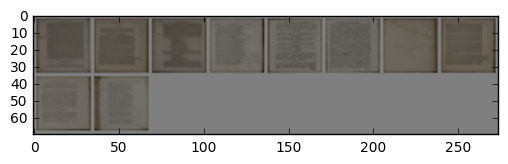

In [77]:
# ----- functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(labels)


In [78]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [80]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [83]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 10 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.065
[1,    11] loss: 0.618
[1,    21] loss: 0.576
[1,    31] loss: 0.587
[1,    41] loss: 0.572
[1,    51] loss: 0.690
[1,    61] loss: 0.621
[1,    71] loss: 0.643
[1,    81] loss: 0.607
[1,    91] loss: 0.651
[1,   101] loss: 0.597
[1,   111] loss: 0.644
[1,   121] loss: 0.600
[1,   131] loss: 0.644
[1,   141] loss: 0.604
[1,   151] loss: 0.587
[1,   161] loss: 0.576
[2,     1] loss: 0.062
[2,    11] loss: 0.575
[2,    21] loss: 0.544
[2,    31] loss: 0.619
[2,    41] loss: 0.605
[2,    51] loss: 0.603
[2,    61] loss: 0.529
[2,    71] loss: 0.692
[2,    81] loss: 0.657
[2,    91] loss: 0.599
[2,   101] loss: 0.662
[2,   111] loss: 0.607
[2,   121] loss: 0.631
[2,   131] loss: 0.614
[2,   141] loss: 0.578
[2,   151] loss: 0.655
[2,   161] loss: 0.621
Finished Training


('GroundTruth: ', 'negative positive negative negative positive negative negative positive positive negative')


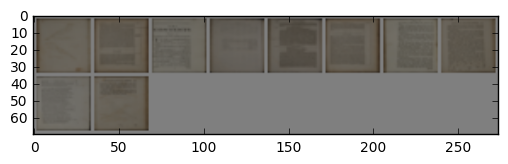

In [85]:
dataiter = iter(valid_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [86]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

('Predicted: ', 'positive positive positive positive positive positive positive positive positive positive')


In [88]:
correct = 0
total = 0
for data in valid_loader:
    if total %20 ==0:
        print(total)
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
Accuracy of the network on the 10000 test images: 70 %
